In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, validation_curve, StratifiedShuffleSplit, cross_validate
from sklearn import metrics

In [ ]:
# The three datasets created during the feature selection process are uploaded. 
# Each dataset contains a different ordering of the feature variables based on their importance.

featuresMIC = pd.read_csv('featuresRankedMIC.csv')
featuresFC = pd.read_csv('featuresRankedFC.csv')
featuresRFC = pd.read_csv('featuresRankedRFC.csv')

# Mutual Information Gain

In [ ]:
# The top 20 features will be selected from each dataset for machine learning.

X = featuresMIC.iloc[:,0:20]
y = featuresMIC['WinningRecord']

In [ ]:
featuresMIC.iloc[:,0:20].head()

,ERA+,OPS+,RA/G,SV,1Run,Under500,BB_P,H_P,R/G,#a-tA-S,DefEff,HR_P,BatAge,BB,WP,HR,SOS,IP,Rtot,IBB
0,0.173913,0.44,0.477612,0.302094,0.559387,0.402703,0.429180,0.622353,0.339394,0.45,0.602041,0.418914,0.292135,0.465585,0.687796,0.380797,0.545455,0.678982,0.391473,0.288005
1,0.637681,0.32,0.000000,0.194577,0.390805,0.389189,0.154861,0.181001,0.133333,0.65,1.000000,0.123964,0.460674,0.410213,0.262041,0.213898,0.454545,0.697641,0.841085,0.380978
2,0.231884,0.56,0.300995,0.265422,0.641762,0.385135,0.429180,0.464920,0.363636,0.75,0.581633,0.189573,0.483146,0.440077,0.221357,0.303797,0.454545,0.710241,0.372093,0.322774
3,0.275362,0.36,0.161692,0.100396,0.618774,0.271622,0.688073,0.159225,0.000000,0.40,0.867347,0.142855,0.505618,0.021753,0.435667,0.126699,0.454545,0.680184,0.569767,0.343635
4,0.594203,0.46,0.208955,0.390013,0.392720,0.528378,0.204570,0.482468,0.442424,0.60,0.663265,0.233241,0.606742,0.540521,0.218771,0.335165,0.363636,0.752545,0.441860,0.520958


In [ ]:
# A stratified train-test split is performed on the dataset, with 80% of the data assigned to training set and 20% assigned to testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
# Parameter for Random Forest algorithm

n_estimators = np.arange(10,105,5)

[0.8969112  0.90320142 0.90320946 0.91488095 0.91578185 0.91668275
 0.91753539 0.92117117 0.92471042 0.91846042 0.92471847 0.92292471
 0.92741313 0.92742921 0.9256435  0.92117117 0.92115508 0.91936937
 0.91936133]


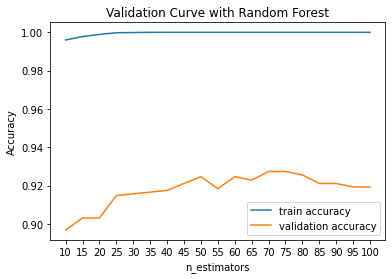

In [ ]:
# 10-fold cross validation is performed on the training set for parameter tuning.
# The n_estimators parameter is assessed for accuracy

train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_mean, label="train accuracy")
plt.plot(n_estimators, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.02458824 0.02506996 0.01652545 0.01143407 0.0170369  0.02624408
 0.0294327  0.02318071 0.02513347 0.02841549 0.02472512 0.02537723
 0.02513824 0.02052375 0.02111502 0.02450599 0.02250297 0.02852785
 0.02260322]


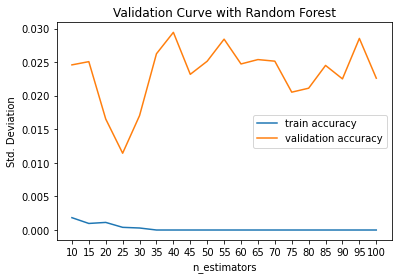

In [ ]:
# The standard deviation is evaluated for each value of n_estimators 

train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='accuracy', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_std, label="train accuracy")
plt.plot(n_estimators, valid_scores_std, label="validation accuracy")

plt.legend()
plt.show()

In [ ]:
RF = RandomForestClassifier(random_state=1, n_estimators=70)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

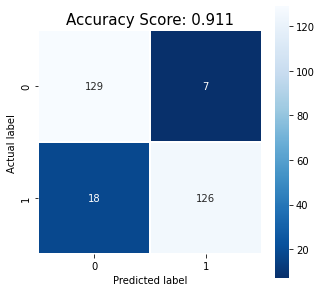

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  126 
FP:  7 
TN:  129 
FN:  18

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       136
           1       0.95      0.88      0.91       144

    accuracy                           0.91       280
   macro avg       0.91      0.91      0.91       280
weighted avg       0.91      0.91      0.91       280



# ANOVA F-test

In [ ]:
# The above process is now repeated for the top 20 features as selected by the ANOVA F-test selection algorithm.

X = featuresFC.iloc[:,0:20]
y = featuresFC['WinningRecord']

In [ ]:
featuresFC.iloc[:,0:20].head()

,ERA+,RA/G,OPS+,1Run,H_P,SV,BB_P,#a-tA-S,R/G,DefEff,Rtot,Under500,IP,BB,PAge,PA,IBB,BatAge,HR_P,SF
0,0.173913,0.477612,0.44,0.559387,0.622353,0.302094,0.429180,0.45,0.339394,0.602041,0.391473,0.402703,0.678982,0.465585,0.405941,0.594126,0.288005,0.292135,0.418914,0.358281
1,0.637681,0.000000,0.32,0.390805,0.181001,0.194577,0.154861,0.65,0.133333,1.000000,0.841085,0.389189,0.697641,0.410213,0.465347,0.356231,0.380978,0.460674,0.123964,0.398932
2,0.231884,0.300995,0.56,0.641762,0.464920,0.265422,0.429180,0.75,0.363636,0.581633,0.372093,0.385135,0.710241,0.440077,0.475248,0.523644,0.322774,0.483146,0.189573,0.538171
3,0.275362,0.161692,0.36,0.618774,0.159225,0.100396,0.688073,0.40,0.000000,0.867347,0.569767,0.271622,0.680184,0.021753,0.336634,0.279588,0.343635,0.505618,0.142855,0.124424
4,0.594203,0.208955,0.46,0.392720,0.482468,0.390013,0.204570,0.60,0.442424,0.663265,0.441860,0.528378,0.752545,0.540521,0.455446,0.566620,0.520958,0.606742,0.233241,0.443268


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

[0.8844112  0.90500322 0.90592021 0.90768983 0.91035232 0.91934524
 0.91842021 0.91397201 0.91395592 0.91396396 0.91932111 0.91752735
 0.91573359 0.91394788 0.9166184  0.91574163 0.91842825 0.91753539
 0.91842825]


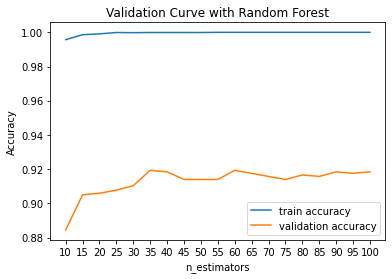

In [ ]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_mean, label="train accuracy")
plt.plot(n_estimators, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.02811198 0.02752933 0.03232951 0.03083201 0.02756387 0.03018191
 0.02646474 0.02338087 0.02571528 0.02409331 0.02505994 0.02404395
 0.02249738 0.02061353 0.02420231 0.02419362 0.0203324  0.02159936
 0.02291318]


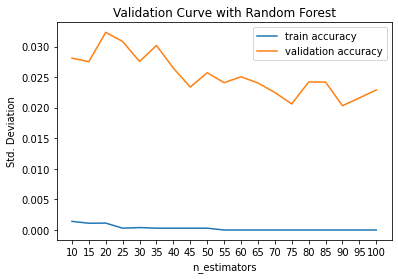

In [ ]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='accuracy', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_std, label="train accuracy")
plt.plot(n_estimators, valid_scores_std, label="validation accuracy")

plt.legend()
plt.show()

In [ ]:
RF = RandomForestClassifier(random_state=1, n_estimators=35)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

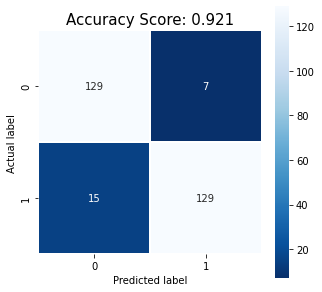

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  129 
FP:  7 
TN:  129 
FN:  15

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       136
           1       0.95      0.90      0.92       144

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280



# Random Forest

In [ ]:
# The above process is now repeated for the top 20 features as selected by the Random Forest selection algorithm.

X = featuresRFC.iloc[:,0:20]
y = featuresRFC['WinningRecord']

In [ ]:
featuresRFC.iloc[:,0:20].head()

,ERA+,OPS+,RA/G,R/G,1Run,SV,H_P,BB_P,#a-tA-S,Under500,DefEff,Rtot,PA,IP,BB,PAge,HR_P,HR,BatAge,IBB
0,0.173913,0.44,0.477612,0.339394,0.559387,0.302094,0.622353,0.429180,0.45,0.402703,0.602041,0.391473,0.594126,0.678982,0.465585,0.405941,0.418914,0.380797,0.292135,0.288005
1,0.637681,0.32,0.000000,0.133333,0.390805,0.194577,0.181001,0.154861,0.65,0.389189,1.000000,0.841085,0.356231,0.697641,0.410213,0.465347,0.123964,0.213898,0.460674,0.380978
2,0.231884,0.56,0.300995,0.363636,0.641762,0.265422,0.464920,0.429180,0.75,0.385135,0.581633,0.372093,0.523644,0.710241,0.440077,0.475248,0.189573,0.303797,0.483146,0.322774
3,0.275362,0.36,0.161692,0.000000,0.618774,0.100396,0.159225,0.688073,0.40,0.271622,0.867347,0.569767,0.279588,0.680184,0.021753,0.336634,0.142855,0.126699,0.505618,0.343635
4,0.594203,0.46,0.208955,0.442424,0.392720,0.390013,0.482468,0.204570,0.60,0.528378,0.663265,0.441860,0.566620,0.752545,0.540521,0.455446,0.233241,0.335165,0.606742,0.520958


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

[0.89335586 0.89962194 0.90501126 0.90592825 0.90594434 0.90325772
 0.91130148 0.91220238 0.91399614 0.91401223 0.914889   0.91131757
 0.91309524 0.91668275 0.91309524 0.9139881  0.91665058 0.91397201
 0.91395592]


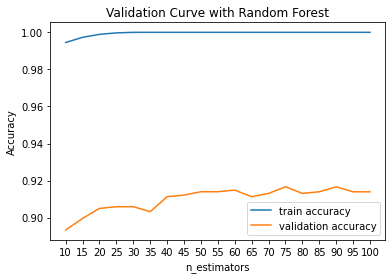

In [ ]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='accuracy', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_mean, label="train accuracy")
plt.plot(n_estimators, valid_scores_mean, label="validation accuracy")

plt.legend()
plt.show()

[0.02352688 0.02156941 0.03230096 0.02883582 0.03118562 0.03055023
 0.02690548 0.02609349 0.02528085 0.03064393 0.02367945 0.02657437
 0.02492058 0.02615597 0.02523844 0.02435028 0.02343349 0.02341787
 0.02245318]


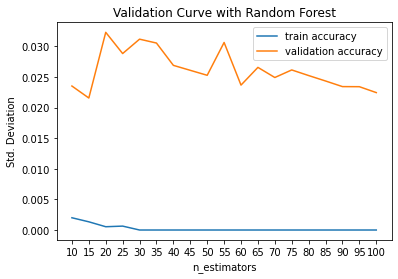

In [ ]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='accuracy', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_std, label="train accuracy")
plt.plot(n_estimators, valid_scores_std, label="validation accuracy")

plt.legend()
plt.show()

In [ ]:
RF = RandomForestClassifier(random_state=1, n_estimators=90)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

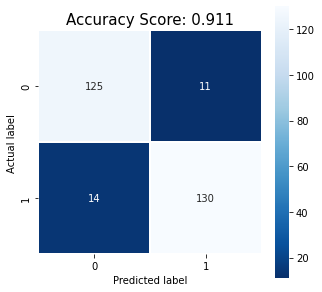

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  130 
FP:  11 
TN:  125 
FN:  14

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       136
           1       0.92      0.90      0.91       144

    accuracy                           0.91       280
   macro avg       0.91      0.91      0.91       280
weighted avg       0.91      0.91      0.91       280

